# Calculating the similarity matrix and using it to fit an SVM

**Note:** This is the new version of the code, using scikit-learn instead of Turi Create (which was deprecated).
If you wish to see the original code in Turi Create that appears in the first edition of the book, please check [here](https://github.com/luisguiserrano/manning/blob/master/Chapter_11_Support_Vector_Machines/DEPRECATED_Calculating_similarities.ipynb).

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### Plotting functions

In [83]:
# This function plots the points
def plot_points(X, y):
    X = np.array(X)
    y = np.array(y)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 35,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(['label 1','label 0'])
    
def plot_model(X, y, model=None):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    grid = np.c_[xx.ravel(), yy.ravel()]

    # compute prediction for each grid point
    Z = np.array([model(p) for p in grid])
    Z = Z.reshape(xx.shape)

    # black curve where prediction = 0
    plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=3)

    # plot original points
    plot_points(X, y)

    # red for negative, blue for positive
    plt.contourf(xx, yy, Z,
                 levels=[-1e9, 0, 1e9],
                 colors=['red', 'blue'],
                 alpha=0.2)

    plt.show()

In [52]:
data = pd.DataFrame({
    'x1': [0,-1,0,0,1,-1,1],
    'x2': [0,0,-1,1,0,1,-1],
    'y': [0,0,0,1,1,1,1]
})

In [12]:
data[['x1','x2']]

,x1,x2
0,0,0
1,-1,0
2,0,-1
3,0,1
4,1,0
5,-1,1
6,1,-1


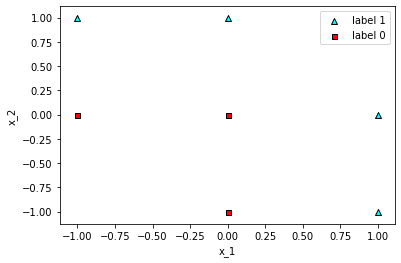

In [13]:
plot_points((data[['x1','x2']]), (data['y']))

### Calculating the similarity matrix

In [37]:
def similarity(x, y):
    return np.exp(-(x[0]-y[0])**2-(x[1]-y[1])**2)

1.522997974471263e-08

In [15]:
data_with_similarities = data.copy()

# Compute all pairwise similarities
for i in range(len(data)):
    column = []
    for j in range(len(data)):
        first = [data.loc[i, 'x1'], data.loc[i, 'x2']]
        second = [data.loc[j, 'x1'], data.loc[j, 'x2']]
        column.append(similarity(first, second))
    data_with_similarities[f'Sim{i}'] = column

data_with_similarities

,x1,x2,y,Sim0,Sim1,Sim2,Sim3,Sim4,Sim5,Sim6
0,0,0,0,1.000000,0.367879,0.367879,0.367879,0.367879,0.135335,0.135335
1,-1,0,0,0.367879,1.000000,0.135335,0.135335,0.018316,0.367879,0.006738
2,0,-1,0,0.367879,0.135335,1.000000,0.018316,0.135335,0.006738,0.367879
3,0,1,1,0.367879,0.135335,0.018316,1.000000,0.135335,0.367879,0.006738
4,1,0,1,0.367879,0.018316,0.135335,0.135335,1.000000,0.006738,0.367879
5,-1,1,1,0.135335,0.367879,0.006738,0.367879,0.006738,1.000000,0.000335
6,1,-1,1,0.135335,0.006738,0.367879,0.006738,0.367879,0.000335,1.000000


### Fitting a (linear) SVM to the similarity matrix

In [16]:
X = data_with_similarities.drop(columns=['y'])
y = data_with_similarities['y']

svm = SVC(kernel='linear')
svm = SVC(kernel='linear')
svm.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
svm.coef_

array([[ 0.67476187,  0.67482825, -1.09720887, -0.64636729, -0.64708568,
         0.01538266,  0.01603589,  0.67770347,  0.6776795 ]])

### Plotting the classifier (Work in progress)

In [72]:
# This function gives the prediction of the SVM on a new point

def svm_rbf_prediction(new_point):
    pairs = data[['x1', 'x2']].values.tolist()
    similarities = [similarity(new_point,pair) for pair in pairs]
    return np.dot(similarities, [-1,-1,-1,1,1,1,1])

In [74]:
# Let's verify that for the points in the dataset, it gives the correct prediction
# (i.e., positive if the label is 1, and negative if the label is -1)

pairs = data[['x1', 'x2']].values.tolist()
for p in pairs:
    print(p, svm_rbf_prediction(p))

[0, 0] -0.7293294335267746
[-1, 0] -0.9749464141121803
[0, -1] -0.9749464141121804
[0, 1] 0.9884223081103513
[1, 0] 0.9884223081103514
[-1, 1] 0.8650001793912898
[1, -1] 0.8650001793912898


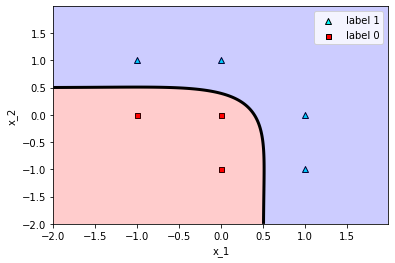

In [82]:
# Now let's plot the boundary of the model!

plot_model(X, y, svm_rbf_prediction)